<a href="https://colab.research.google.com/github/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Importing all the required libraries.

In [44]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from google.colab import auth

# Question 1

In [42]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable sortable")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]

 getting only Himalayas

In [39]:
df_himalayan=df[df.Range=="Himalayas"]
df_himalayan

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


bar plot of ranges

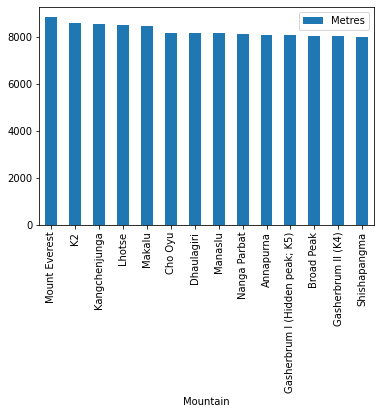

In [38]:
df.plot.bar(x="Mountain",y="Metres")

box plot of ranges

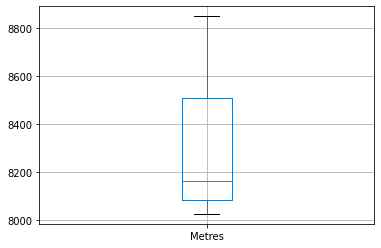

In [35]:
df.boxplot(column="Metres")

mean, std, and five number summary

In [26]:
df.Feet.describe()

count       10.000000
mean     27295.600000
std        886.239521
min      26335.000000
25%      26690.250000
50%      26829.500000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

groups summary

In [41]:
print(df.groupby("Range").mean())
print(df.groupby("Range").median())

            Metres     Feet
Range                      
Himalayas  8319.70  27295.6
Karakoram  8194.25  26884.0
           Metres     Feet
Range                     
Himalayas  8177.5  26829.5
Karakoram  8065.5  26461.5


# Question 2

In [45]:
auth.authenticate_user()
print('Authenticated')

Authenticated


number of totyal rows in the table

In [50]:
%%bigquery --project data-visualization-338722
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`


,total_rows
0,198792903


In [52]:
%%bigquery --project data-visualization-338722
SELECT  payment_type, AVG(trip_total) as avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trip_total
0,Unknown,17.649893
1,Mobile,20.339910
2,Prepaid,22.377662
3,Dispute,15.496588
4,Pcard,10.116931
5,Way2ride,16.639366
6,Split,18.788039
7,Credit Card,20.524892
8,Prcard,20.320682
9,Cash,12.265548


In [67]:
%%bigquery --project data-visualization-338722
SELECT  COUNT(*) as counted_value
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds IS NOT NULL AND trip_seconds>(SELECT AVG(trip_seconds) FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,counted_value
0,62143014
